<a href="https://colab.research.google.com/github/hemanthreddygadi/Credit-Card-Fraud-Detection/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
credit_card_data = pd.read_csv('/content/sample_data/creditcard.csv', on_bad_lines='skip')

<ipython-input-21-2156b608b9be>:1: DtypeWarning: Columns (2,4,22) have mixed types. Specify dtype option on import or set low_memory=False.
  credit_card_data = pd.read_csv('/content/sample_data/creditcard.csv', on_bad_lines='skip')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.0727811733098497,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277837575558899,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.26615071205963,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638671952771851,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.34016307473609,1.773209,0.37978,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679401917229,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226008082898,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.00527359678253453,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877736754848451,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.79827849458971,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [10]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284795,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.0
284796,172787.0,-0.732789,-0.05508,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.0
284797,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.0
284798,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.0
284799,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0.0


In [11]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284800 entries, 0 to 284799
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284800 non-null  float64
 1   V1      284800 non-null  float64
 2   V2      284800 non-null  object 
 3   V3      284800 non-null  float64
 4   V4      284800 non-null  object 
 5   V5      284800 non-null  float64
 6   V6      284800 non-null  float64
 7   V7      284800 non-null  float64
 8   V8      284800 non-null  float64
 9   V9      284799 non-null  float64
 10  V10     284799 non-null  float64
 11  V11     284799 non-null  float64
 12  V12     284799 non-null  float64
 13  V13     284798 non-null  float64
 14  V14     284798 non-null  float64
 15  V15     284798 non-null  float64
 16  V16     284798 non-null  float64
 17  V17     284797 non-null  float64
 18  V18     284797 non-null  float64
 19  V19     284796 non-null  float64
 20  V20     284795 non-null  float64
 21  V21     28

In [12]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,1


In [13]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0.0,284299
1.0,492


In [14]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [15]:
print(legit.shape)
print(fraud.shape)

(284299, 31)
(492, 31)


In [16]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,284299.000000
mean,88.294072
std,250.111454
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [17]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [23]:
print(credit_card_data.dtypes)


Time      float64
V1        float64
V2         object
V3        float64
V4         object
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22        object
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object


In [24]:
credit_card_data['Amount'] = pd.to_numeric(credit_card_data['Amount'], errors='coerce')


In [25]:
# Example: Fill NaN with the mean of the column
credit_card_data['Amount'].fillna(credit_card_data['Amount'].mean(), inplace=True)


<ipython-input-25-018b034de182>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_card_data['Amount'].fillna(credit_card_data['Amount'].mean(), inplace=True)


In [26]:
import pandas as pd

# Assuming you have already loaded your dataset
# credit_card_data = pd.read_csv('creditcard.csv')

# Check data types
print(credit_card_data.dtypes)

# Convert relevant columns to numeric, if necessary
credit_card_data['Amount'] = pd.to_numeric(credit_card_data['Amount'], errors='coerce')

# Handle NaN values
credit_card_data['Amount'].fillna(credit_card_data['Amount'].mean(), inplace=True)

# Example aggregation (grouping by 'Class' and calculating the mean of 'Amount')
aggregated_data = credit_card_data.groupby('Class').agg({'Amount': 'mean'})
print(aggregated_data)


Time      float64
V1        float64
V2         object
V3        float64
V4         object
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22        object
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object
           Amount
Class            
0.0     88.294072
1.0    122.211321


<ipython-input-26-13d3c46c9b4e>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_card_data['Amount'].fillna(credit_card_data['Amount'].mean(), inplace=True)


In [34]:
# Group by 'Class' and calculate the mean for each class
mean_values = credit_card_data.groupby('Class').mean()

# Filter out the unwanted class (0.001728)
mean_values_filtered = mean_values[mean_values.index.isin([0, 1])]

# Display the filtered mean values
print("\nFiltered Mean Values for Each Class:")
print(mean_values_filtered)


Filtered Mean Values for Each Class:
               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0.0    94842.139378  0.008266 -0.006314  0.012160 -0.007861  0.005462   
1.0    80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0.0    0.002422  0.009639 -0.000968  0.004415  ... -0.000658 -0.001246   
1.0   -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0.0    0.000001  0.000066  0.000192 -0.000080 -0.000088 -0.000301 -0.000130   
1.0    0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0.0     88.2940

In [35]:
legit_sample = legit.sample(n=492)

In [36]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [37]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
240187,150477.0,-0.373585,-0.133501,0.843791,1.280024,1.062380,0.002025,-0.044356,0.215227,0.075724,...,-0.219342,-0.540607,0.487052,-0.447241,-1.547681,-1.150821,0.344151,0.310403,24.04,0.0
44531,41986.0,1.404845,-0.958269,-0.613266,-1.79773662864859,1.009978,3.535838,-1.582540,0.926631,-0.544848,...,0.337116,0.752714,-0.150497,1.049895,0.584843,-0.035742,0.038004,0.021554,24.99,0.0
165238,117304.0,-1.133163,-0.296202,-0.156244,0.340263,2.065935,-1.072536,0.312946,-0.103022,-0.302671,...,-0.242115,-0.639686,0.588579,0.328504,-0.606422,0.289576,0.006752,0.325100,1.98,0.0
75174,55940.0,-0.260149,-0.735173,1.824563,-1.893632,-1.694996,0.408066,-0.663884,0.120174,-1.360237,...,-0.225938,-0.17495,-0.118768,-0.498712,-0.140028,-0.190906,0.033769,0.033757,96.00,0.0
21911,34746.0,-0.937280,0.43369526546305,2.868279,0.962267,-0.028020,0.587218,0.035250,0.271847,0.198762,...,0.042904,0.479486479303262,-0.106321,0.080722,0.071873,-0.251703,0.221490,-0.066022,26.02,0.0


In [38]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279856,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1.0
280136,169347.0,1.378559,1.289381,-5.004247,1.41185,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1.0
280142,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1.0
281137,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1.0
281667,170348.0,1.991976,0.158476,-2.583441,0.40867,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1.0


In [39]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,492
1.0,492


In [42]:
# Group by 'Class' and calculate the mean for each class in new_dataset
mean_values_new_dataset = new_dataset.groupby('Class').mean()

# Filter out unwanted class (0.001728) from new_dataset
mean_values_filtered_new_dataset = mean_values_new_dataset[mean_values_new_dataset.index.isin([0, 1])]

# Display the filtered mean values for new_dataset
print("\nFiltered Mean Values for Each Class in New Dataset:")
print(mean_values_filtered_new_dataset)


Filtered Mean Values for Each Class in New Dataset:
               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0.0    95654.154472 -0.087862  0.046565 -0.090196  0.012448  0.005279   
1.0    80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0.0    0.062732 -0.059074 -0.045203 -0.036198  ... -0.050760 -0.022007   
1.0   -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0.0   -0.011622 -0.012336 -0.020018 -0.018176 -0.007622 -0.001469  0.035323   
1.0    0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              


In [43]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [44]:
print(X)


            Time        V1        V2        V3        V4        V5        V6  \
240187  150477.0 -0.373585 -0.133501  0.843791  1.280024  1.062380  0.002025   
44531    41986.0  1.404845 -0.958269 -0.613266 -1.797737  1.009978  3.535838   
165238  117304.0 -1.133163 -0.296202 -0.156244  0.340263  2.065935 -1.072536   
75174    55940.0 -0.260149 -0.735173  1.824563 -1.893632 -1.694996  0.408066   
21911    34746.0 -0.937280  0.433695  2.868279  0.962267 -0.028020  0.587218   
...          ...       ...       ...       ...       ...       ...       ...   
279856  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280136  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280142  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281137  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281667  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [45]:
print(Y)

240187    0.0
44531     0.0
165238    0.0
75174     0.0
21911     0.0
         ... 
279856    1.0
280136    1.0
280142    1.0
281137    1.0
281667    1.0
Name: Class, Length: 984, dtype: float64


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [47]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [48]:
model = LogisticRegression()

In [55]:
from sklearn.linear_model import LogisticRegression

# Example: Increasing max_iter
model = LogisticRegression(max_iter=500)

In [62]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load your dataset (replace with your actual dataset)
# credit_card_data = pd.read_csv('creditcard.csv')

# Check unique values in the target variable
print("Unique values in the target variable:", credit_card_data['Class'].unique())
print("Data type of 'Class':", credit_card_data['Class'].dtype)

# Convert to integer if necessary
credit_card_data['Class'] = credit_card_data['Class'].astype(int)

# Check for NaN values
print("NaN values in 'Class':", credit_card_data['Class'].isna().sum())
credit_card_data = credit_card_data.dropna(subset=['Class'])  # Drop NaNs if any

# Define features and target variable
X = credit_card_data.drop('Class', axis=1)  # Features
y = credit_card_data['Class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)  # Fit the model

# Evaluate the model
accuracy = model.score(X_test_scaled, y_test)
print(f'Accuracy: {accuracy:.2f}')


Unique values in the target variable: [0.         1.         0.00172758]
Data type of 'Class': float64
NaN values in 'Class': 0
Accuracy: 1.00


In [63]:
model = LogisticRegression(solver='liblinear', max_iter=500)


In [50]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [64]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9466327827191868


In [52]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [65]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9187817258883249


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


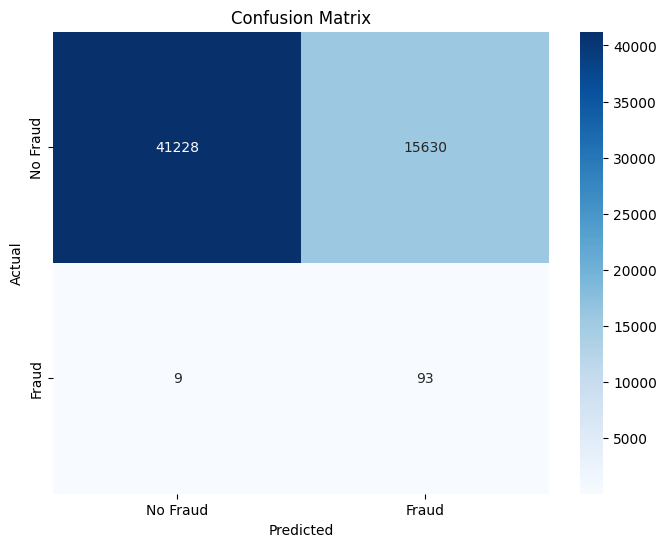

In [68]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix  # Import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data loaded into X and y (features and target)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression(max_iter=50)

# Fit the model to the training data
model.fit(X_train, y_train)

# Now you can make predictions:
y_pred = model.predict(X_test_scaled)  # Assuming X_test_scaled is defined

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Create cm here

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [69]:
import numpy as np

# Get feature names and their corresponding coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print("Feature Importance (Top 10):")
print(feature_importance.head(10))


Feature Importance (Top 10):
   Feature  Coefficient  Abs_Coefficient
14     V14    -1.094971         1.094971
3       V3    -0.369752         0.369752
17     V17    -0.244407         0.244407
9       V9    -0.186765         0.186765
10     V10    -0.134760         0.134760
7       V7    -0.132712         0.132712
16     V16    -0.122324         0.122324
13     V13    -0.116878         0.116878
5       V5    -0.099614         0.099614
1       V1    -0.093954         0.093954


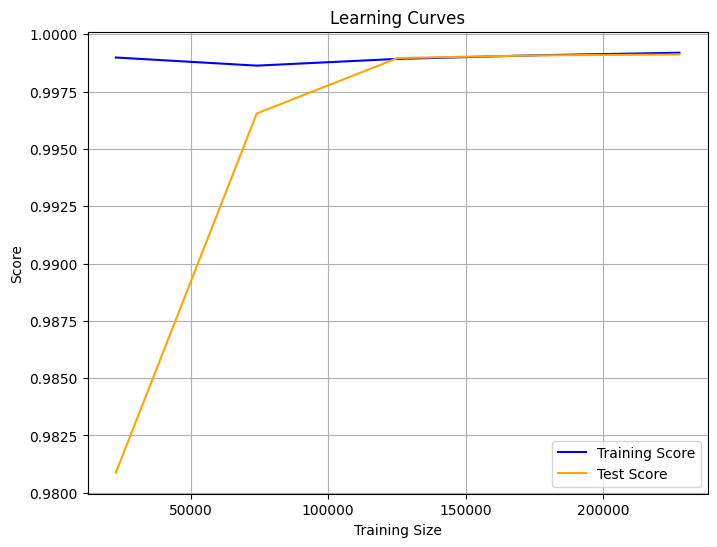

In [70]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, y, cv=5, n_jobs=-1)

# Calculate mean and std for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Test Score', color='orange')
plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()
